**1. OBJETIVO DO PROJETO**

Analisar os fatores determinantes ou não para a inadimplência de alguns clientes de uma instituição financeira específica.

**2. BIBLIOTECAS E BASE DE DADOS**

Para esta análise foi utilizado uma base de dados extraído do Github e indicado pelo professor. Nesta os dados encontram-se em formato CSV e contém informações de determinada instituição financeira.
Com isso, será observado em especial a coluna DEFAULT, a qual indica se o cliente é inadimplente (default = 1) ou adimplente (default =0). E o como as demais variáveis se comportam e influenciem essa tomada de decisão.
Segue a lista das variáveis em estudo.




| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

Na sequência serão importadas as bibliotecas necessárias e definindo os dados faltantes (na):


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Arquivo de banco de dados para análise

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# Amostra da base:

df.head(n=15)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


2. EXPLORAÇÃO DE DADOS

Inicialmente, é importante observar o equilíbrio da base de dados, ou seja, verificar a proporção de dados entre clientes que estão em dia com seus pagamentos e aqueles que estão em atraso.

In [2]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape

qtd_total, _ = df.shape  # quantidade de linhas e colunas referentes aos adimplentes
qtd_adimplentes, _ = df[df['default'] == 0].shape  # quantidade de linhas e colunas referentes aos adimplentes
qtd_inadimplentes, _ = df[df['default'] == 1].shape # quantidade de linhas e colunas referentes aos inadimplentes

print(f"A proporcão total de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão total de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão total de clientes adimplentes é de 83.93%
A proporcão total de clientes inadimplentes é de 16.07%


Observamos portanto que o número total de clientes apresenta uma porcentagem maior de adimplentes que inadimplentes.

**2.1 SCHEMA**

Verificando o tipo da informação e o tipo de dado, e consequentemente, sua consistência:

In [3]:
# Visualização das primeiras 10 linhas do df
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [4]:
# Descobrindo qual o tipo de dado de cada coluna do df
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Os atributos 'limite_credito' e 'valor_transacoes_12m' apresentam definições inconsistentes, afinal deveriam constar FLOAT ao invés de OBJECT.


Fazendo uma visualização dos atributos categóricos e numéricos:




In [5]:
# Dados categóricos:

df.dtypes
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2014567722445543119, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2014567722445543119, *['count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2014567722445543119, *['unique'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2014567722445543119, *['top'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2014567722445543119, *['index', 'count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2014567722445543119, *['count', 'unique'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2014567722445543119, *['unique', 'top'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2014567722445543119 = autoviz.get_df('df_2014567722445543119')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2014567722445543119, *['top', 'freq'], **{})
chart

In [6]:
# Dados numéricos:

df.dtypes
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


Quanto aos atributos categóricos pode-se perceber que há dados faltantes nos atributos 'escolaridade', 'estado_civil' e 'salario_anual', devido à quantidades ser inferior a 10127. Enquanto em relação aos atributos numéricos não consta nenhum dado faltante.

**2.2. DADOS FALTANTES**

Em decorrência da possível falta de dados, faz-se necessário identificar em quais colunas aparecem esse hiato.

In [7]:
# Identificando as colunas com dados faltantes:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

E assim poder verificar se estes dados alteram a percentagem da quantidade de dados dos atributos com dados faltantes de uma forma geral e também de forma mais específica dentre os inadimplentes e adimplentes.

In [8]:
# Percentual total de dados faltantes:

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [9]:
# Percentual de dados faltantes dos adimplentes:

stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [10]:
# Percentual de dados faltantes dos inadimplentes:

stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


 Fica claro portanto que a proporção entre as três análises é similar em relação aos dados faltantes para os três atributos em questão. Isso significa que a ausência de dados está distribuída de forma semelhante entre eles.

Sendo assim, pode-se inferir que a remoção das linhas que contêm dados faltantes não introduzirá um viés significativo na análise dos dados. Ou seja, a exclusão dessas linhas não afetará substancialmente as conclusões ou os resultados obtidos a partir da análise dos dataframes. Isso pode ser feito sem preocupações de que as informações ausentes distorçam os resultados da análise.

**3. TRANSFORMAÇÃO E LIMPEZA DE DADOS**

Anteriormente foi ressaltado que as colunas 'limite_credito' e 'valor_transacoes_12m' apresentavam uma interpretação inconsistente e para tal segue a devida transformação (de object para float):


In [11]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Consequentemente realizando a remoção dos dados faltantes.

In [12]:
df.dropna(inplace=True)

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Aparentemente a hipótese inicial foi mantida de que, mesmo após a remoção dos dados faltantes as proporções de clientes adimplentes e inadimplentes ficou praticamente a mesma.

Sendo esta etapa finalizada com êxito e possibilitando a partir deste momento uma análise real e a conclusão final da pesquisa.

**4. ANALISANDO OS DADOS**

Com os dados corrigidos, vamos gerar algumas visualizações comparativas com intuito de poder gerar insights necessários para uma resposta ao nosso problema inicial.

Inicialmente, separamos os clientes inadimplentes e adimplentes.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

E assim, relacionar o resultado com os atributos categóricos e numéricos:

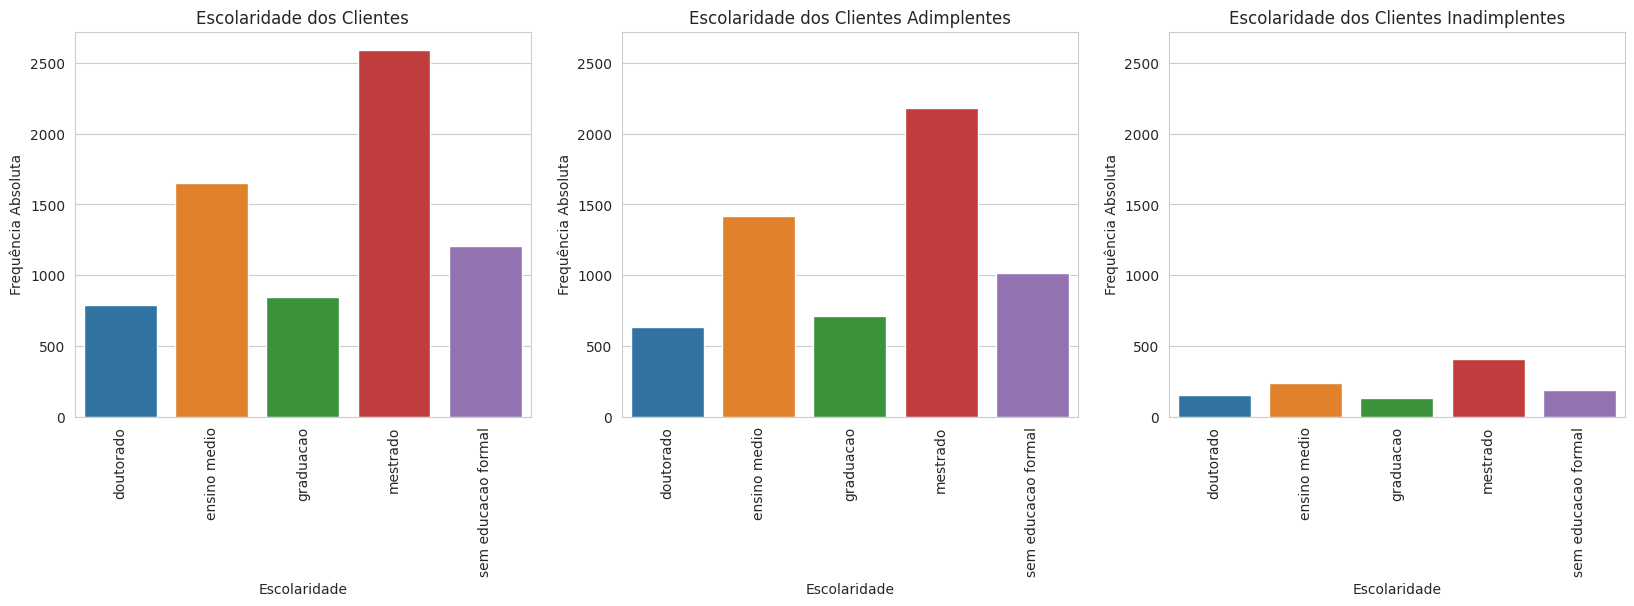

In [14]:
# Relação com o atributo ESCOLARIDADE

df.select_dtypes('object').head(n=10)

coluna = 'escolaridade'
titulos = [
 'Escolaridade dos Clientes',
 'Escolaridade dos Clientes Adimplentes',
 'Escolaridade dos Clientes Inadimplentes'
]
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.sort_values(by=[coluna], inplace=True)
 df_to_plot.sort_values(by=[coluna])
 f = sns.barplot(
 x=df_to_plot[coluna],
 y=df_to_plot['frequencia_absoluta'],
 ax=eixos[eixo]
 )
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

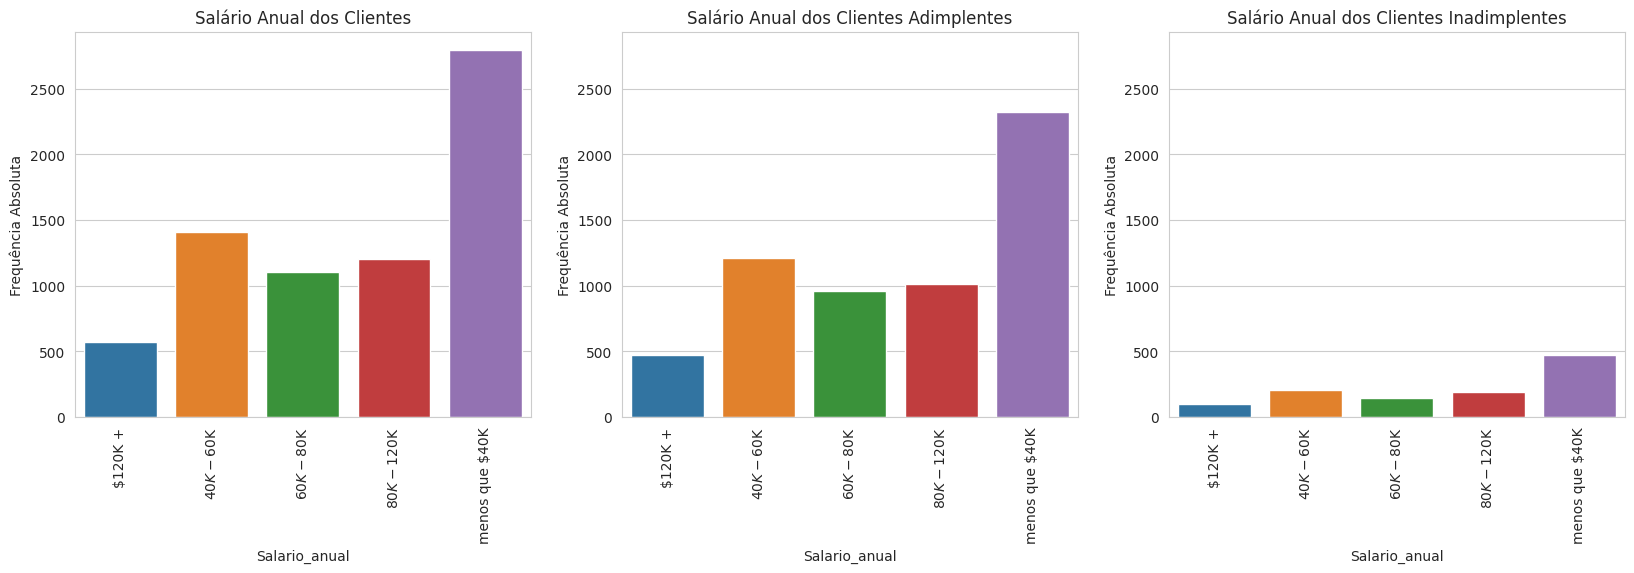

In [15]:
# Relação com o atributo SALÁRIO ANUAL

df.select_dtypes('object').head(n=10)

coluna = 'salario_anual'
titulos = [
 'Salário Anual dos Clientes',
 'Salário Anual dos Clientes Adimplentes',
 'Salário Anual dos Clientes Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.reset_index(inplace=True, drop=True)
 df_to_plot.sort_values(by=[coluna], inplace=True)
 f = sns.barplot(
 x=df_to_plot[coluna],
 y=df_to_plot['frequencia_absoluta'],
 ax=eixos[eixo]
 )
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()


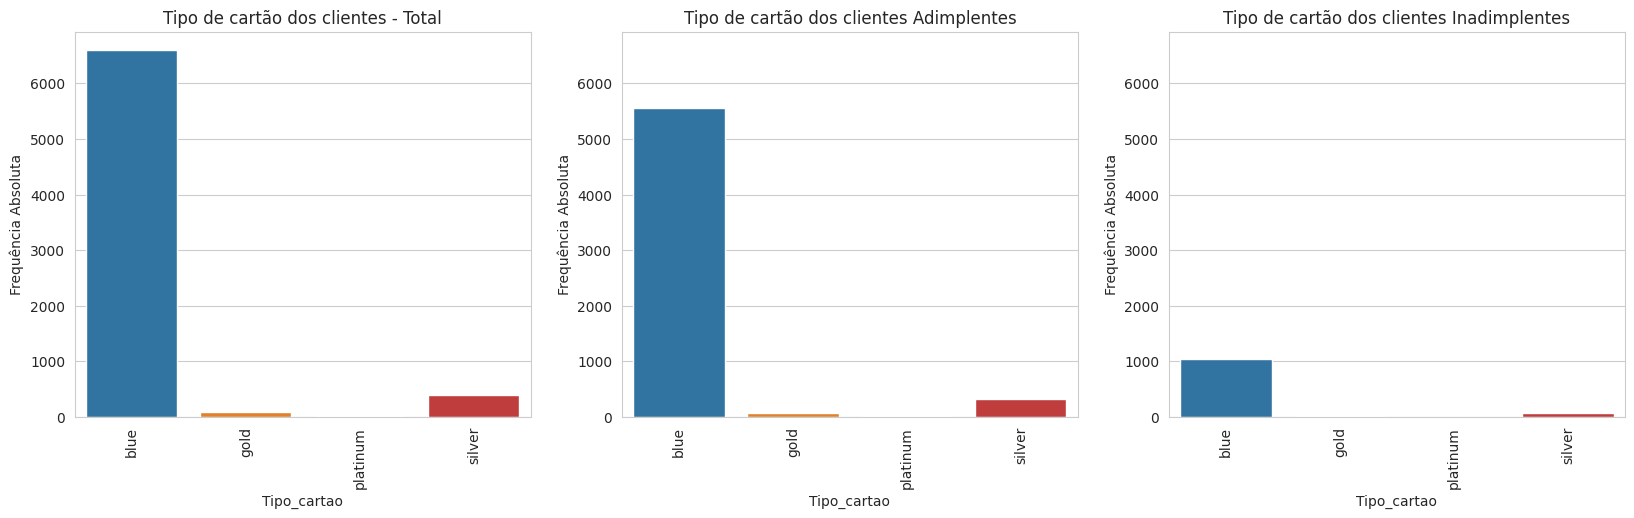

In [16]:
# Relação com o atributo TIPO DO CARTÃO

coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes - Total','Tipo de cartão dos clientes Adimplentes','Tipo de cartão dos clientes Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.reset_index(inplace=True, drop=True)
 df_to_plot.sort_values(by=[coluna], inplace=True)

 f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'],ax=eixos[eixo])
 f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')

 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))

 eixo += 1
 figura.show()

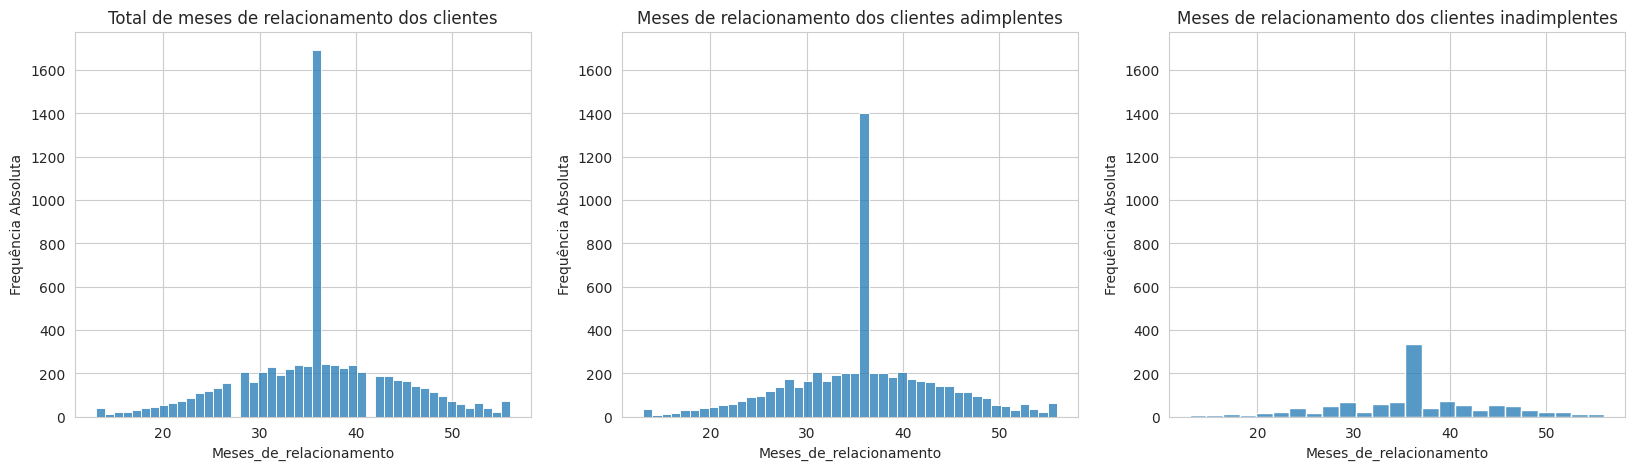

In [17]:
# Relação com o atributo MESES DE RELACIONAMENTO
coluna = 'meses_de_relacionamento'
titulos = ['Total de meses de relacionamento dos clientes', 'Meses de relacionamento dos clientes adimplentes', 'Meses de relacionamento dos clientes inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

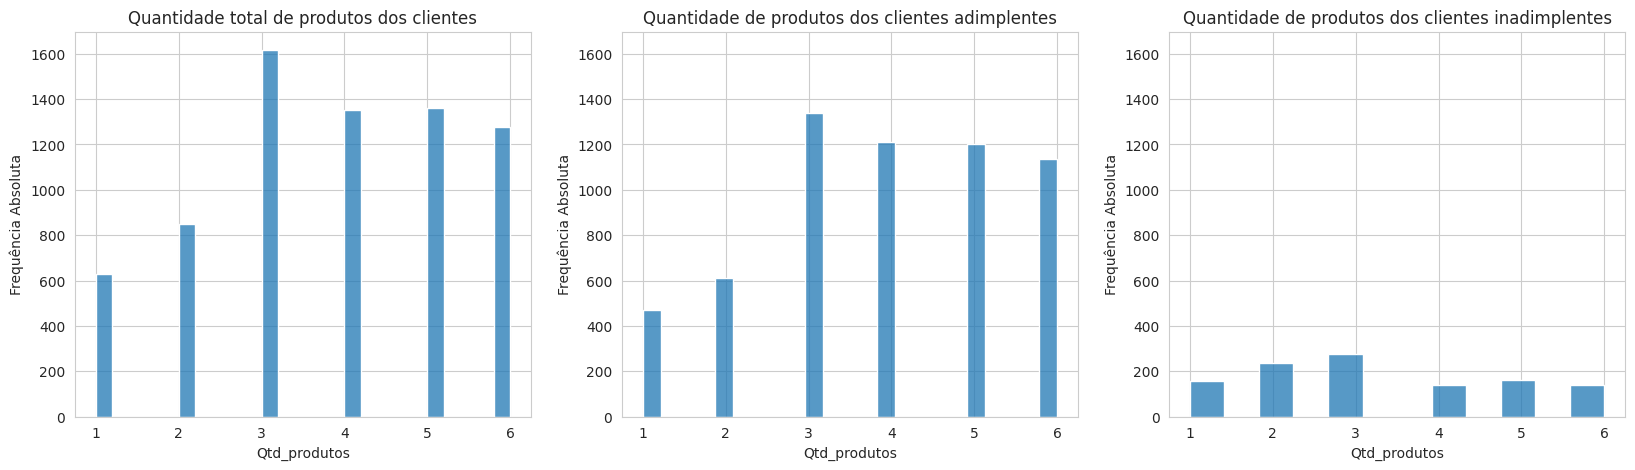

In [18]:
# Relação com o atributo QUANTIDADE DE PRODUTOS
coluna = 'qtd_produtos'
titulos = ['Quantidade total de produtos dos clientes', 'Quantidade de produtos dos clientes adimplentes', 'Quantidade de produtos dos clientes inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

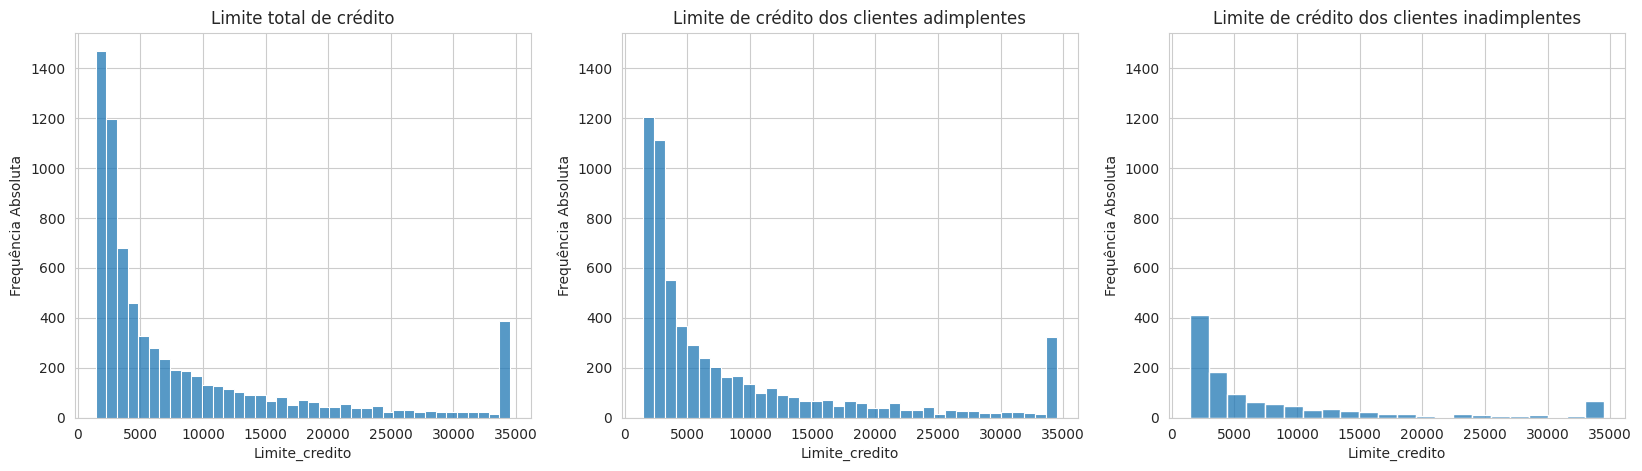

In [19]:
# Relação com o atributo LIMITE DE CRÉDITO
coluna = 'limite_credito'
titulos = ['Limite total de crédito', 'Limite de crédito dos clientes adimplentes', 'Limite de crédito dos clientes inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

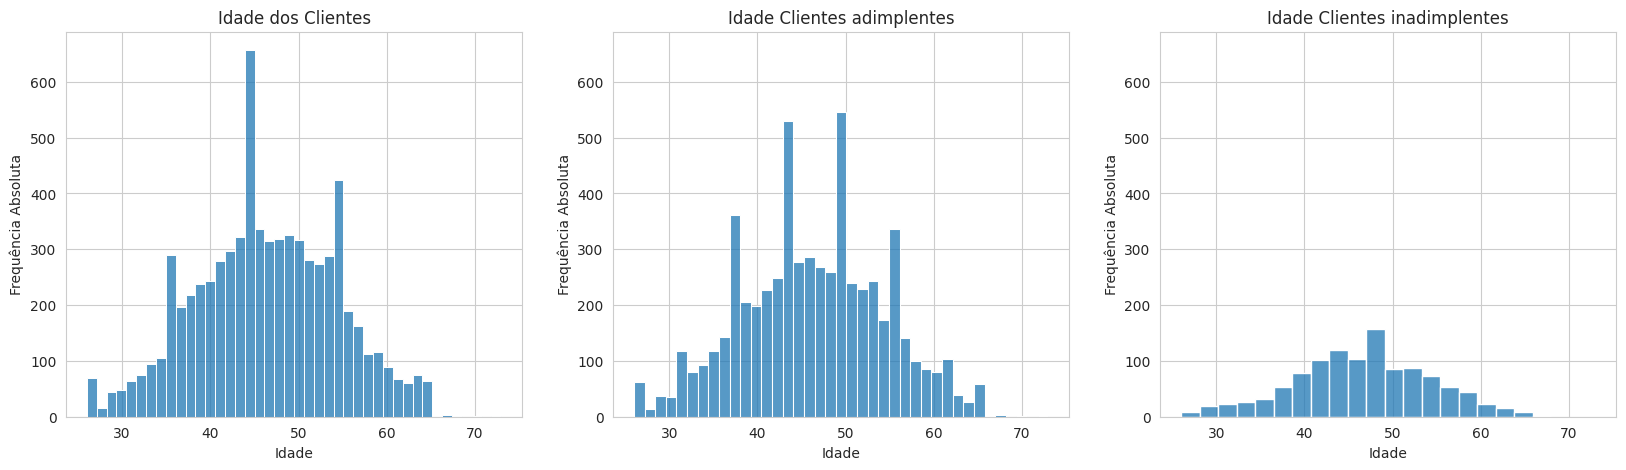

In [20]:
# Relação com o atributo IDADE
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade Clientes adimplentes', 'Idade Clientes inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Destas podemos extrair que:

*   A escolaridade, o salário anual, a quantidade de produtos e limite de crédito não apresentam variações significativas para este projeto.
*  Quanto ao tipo de cartão, pode-se observar que a maior parte possui o BLUE e que todos que possuem GOLD são adimplentes.
*   A maioria dos clientes tem um relacionamento de 36 meses, e o tempo de relacionamento não afeta significativamente a inadimplência, exceto nos casos de 28 e 42 meses, onde há menos inadimplentes.
*   E quanto à idade que clientes entre 40 e 50 anos possuem maior tendência a serem inadimplentes.


De forma geral, esses atributos não apresentam relevância suficiente para uma conclusão.

Seguem as demais análises com algumas consistências:






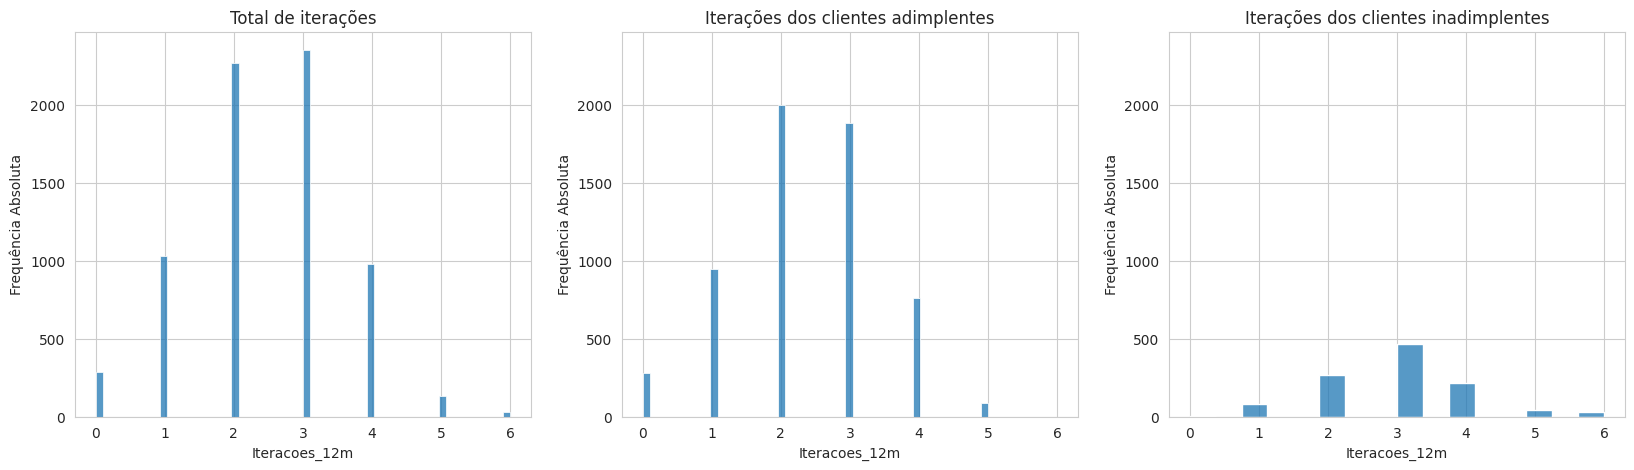

In [21]:
# Relação com o atributo ITERAÇÕES NOS ÚLTIMOS 12 MESES
coluna = 'iteracoes_12m'
titulos = ['Total de iterações', 'Iterações dos clientes adimplentes', 'Iterações dos clientes inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Nota-se que os gráficos mostram que clientes sem interações são geralmente adimplentes. À medida que o número de interações aumenta, a probabilidade de inadimplência também aumenta. O momento crítico parece ocorrer na mudança de 2 para 3 interações, sugerindo que esses clientes devem ser acompanhados de perto, pois há maior tendência de se tornarem inadimplentes.

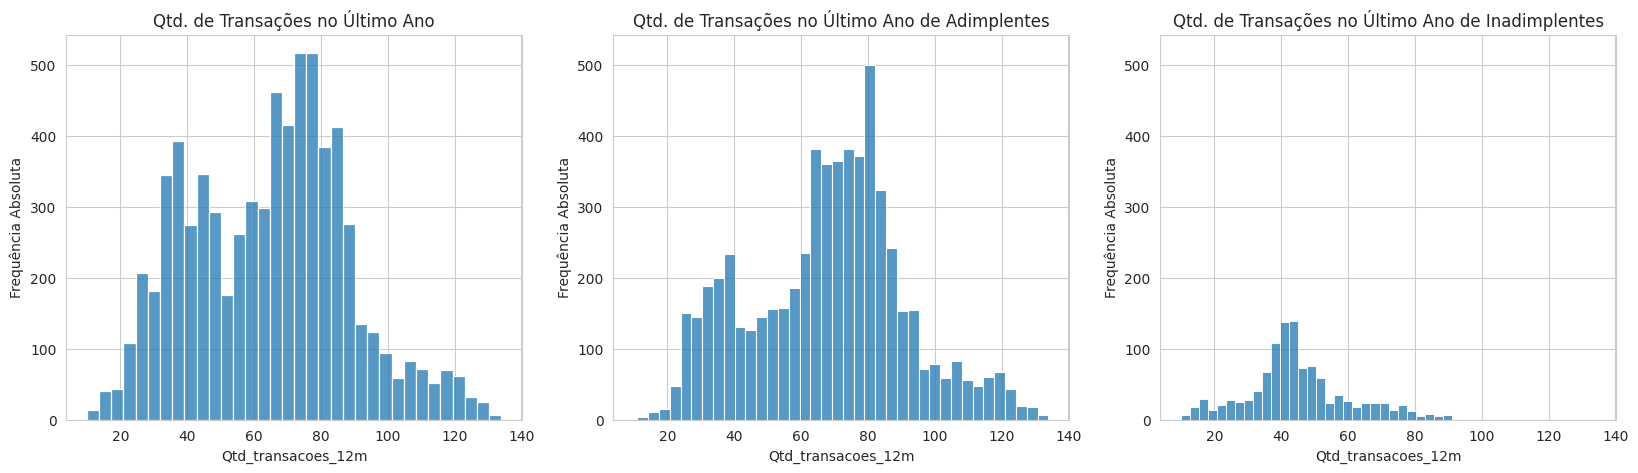

In [22]:
# Relação com o atributo QUANTIDADE DE TRANSAÇÕES NOS ÚLTIMOS 12 MESES

coluna = 'qtd_transacoes_12m'
titulos = [
 'Qtd. de Transações no Último Ano',
 'Qtd. de Transações no Último Ano de Adimplentes',
 'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()

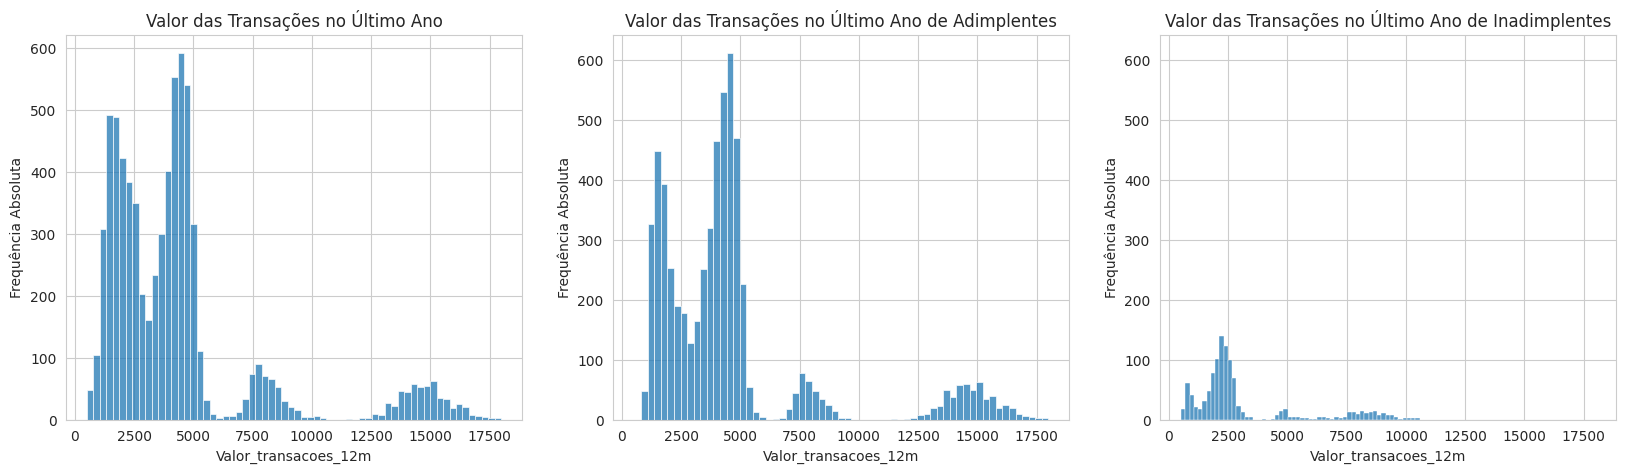

In [23]:
# Relação com o atributo VALOR DAS TRANSAÇÕES NOS ÚLTIMOS 12 MESES


coluna = 'valor_transacoes_12m'
titulos = [
 'Valor das Transações no Último Ano',
 'Valor das Transações no Último Ano de Adimplentes',
 'Valor das Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
 f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
 f.set(
 title=titulos[eixo],
 xlabel=coluna.capitalize(),
 ylabel='Frequência Absoluta'
 )
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))
 eixo += 1
figura.show()


Os gráficos das "quantidades de transações" mostram dois picos em torno de 40 e 80 transações para todos os clientes. Nos clientes adimplentes, o pico de 40 transações é mais suave, enquanto nos inadimplentes, ele é mais pronunciado, completando o que falta no gráfico dos adimplentes. O mesmo padrão ocorre com o atributo "Valor das transações". Isso sugere que esses atributos têm relação com o objetivo do projeto.

Sendo assim, vamos analisar os dois atributos em um mesmo gráfico para uma análise mais precisa.

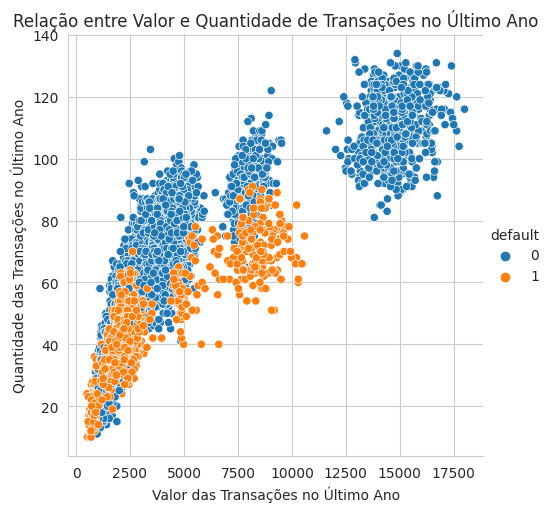

In [24]:
# Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

f = sns.relplot(
 x='valor_transacoes_12m',
 y='qtd_transacoes_12m',
 data=df,
 hue='default'
)
_ = f.set(
 title='Relação entre Valor e Quantidade de Transações no Último Ano',
 xlabel='Valor das Transações no Último Ano',
 ylabel='Quantidade das Transações no Último Ano'
 )

Ao examinarmos o gráfico acima, podemos concluir que existem três grupos distintos: um contendo apenas adimplentes, outro com uma mistura de adimplentes e inadimplentes, e um terceiro contendo apenas inadimplentes.

Ao focarmos nos clientes com bom histórico de pagamentos, percebemos que aqueles com alto volume de transações (acima de 80) e valores elevados (acima de 12 mil) tendem a ser adimplentes.

**5. INSIGHTS GERADOS**


Deste projeto, podemos concluir que existe a necessidade de uma preocupação maior em preencher os dados faltantes para que de fato a conclusão seja a mais precisa e real possível.

Porém os dados presentes já possibilitam uma noção de que deve-se focar em especial nos clientes com transações com valores menores que 2,5k reais e aqueles que possuem um volume médio de transações e valor entre 7k e 10k reais, bem como clientes na faixa etária de 40 e 50 anos.

Também podemos perceber, em especial quanto à quantidade de transações e valores destas que existe uma tendência para inadimplência quando a quantidade de transações estiverem até 60 e valores de 3000, bem como com quantidade de transações entre 40 e 90 com valores entre 3000 e 10000. Ambos apresentam tendência à inadimplência.

Os demais dados não apresentam uma variação significativa para esta análise.
